In [1]:
# install the metpy package for plotting skew-T
!pip install metpy
!pip install siphon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


In [1]:
from datetime import datetime
from siphon.simplewebservice.igra2 import IGRAUpperAir

import matplotlib.pyplot as plt
# import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

In [2]:
date = datetime(2021, 7, 29, 12)
station = 'USM00072797' # station list at https://www.ncei.noaa.gov/pub/data/igra/igra2-station-list.txt
data, header = IGRAUpperAir.request_data(date, station)


In [3]:
data

,lvltyp1,lvltyp2,etime,pressure,pflag,height,zflag,temperature,tflag,relative_humidity,direction,speed,date,u_wind,v_wind,dewpoint
0,2,1,0.0,1013.04,2,57,0,16.1,2,94.0,325,2.3,2021-07-29 12:00:00,1.3,-1.9,15.1
1,1,0,24.0,1000.00,0,167,2,15.2,2,96.5,348,4.7,2021-07-29 12:00:00,1.0,-4.6,14.7
2,2,0,60.0,980.92,0,331,2,14.1,2,99.5,342,6.7,2021-07-29 12:00:00,2.1,-6.4,14.0
3,2,0,77.0,970.74,0,419,2,14.0,2,99.4,334,7.9,2021-07-29 12:00:00,3.5,-7.1,13.9
4,2,0,92.0,962.35,0,492,2,14.9,2,91.9,328,9.7,2021-07-29 12:00:00,5.1,-8.2,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,3,0,NaN,NaN,0,32000,0,NaN,0,NaN,100,17.5,2021-07-29 12:00:00,-17.2,3.0,NaN
247,3,0,NaN,NaN,0,32500,0,NaN,0,NaN,95,12.3,2021-07-29 12:00:00,-12.3,1.1,NaN
248,3,0,NaN,NaN,0,33000,0,NaN,0,NaN,85,14.4,2021-07-29 12:00:00,-14.3,-1.3,NaN
249,3,0,NaN,NaN,0,33500,0,NaN,0,NaN,80,14.9,2021-07-29 12:00:00,-14.7,-2.6,NaN


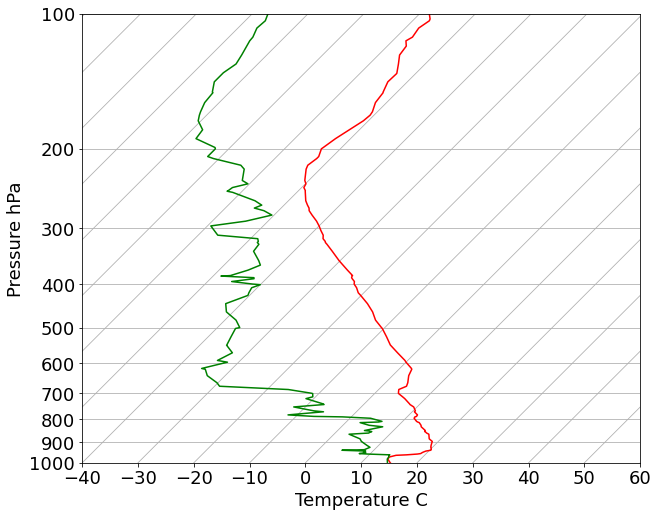

In [15]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = '18'

skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(data['pressure'], data['temperature'], 'r')
skew.plot(data['pressure'], data['dewpoint'], 'g')
# skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
# ax.xlabel('Temperature C')
skew.ax.set_xlabel('Temperature C')
skew.ax.set_ylabel('Pressure hPa')

plt.show()

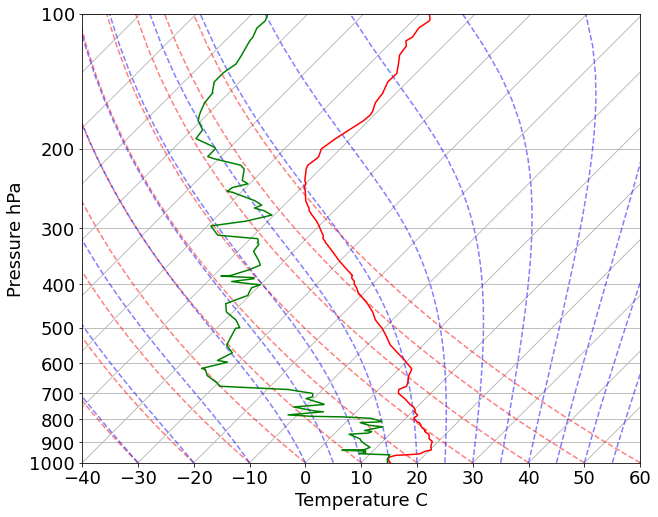

In [25]:
# with dry adiabatics

fig = plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = '18'

skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(data['pressure'], data['temperature'], 'r')
skew.plot(data['pressure'], data['dewpoint'], 'g')

# skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
# ax.xlabel('Temperature C')
skew.ax.set_xlabel('Temperature C' )
skew.ax.set_ylabel('Pressure hPa')

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()

plt.show()